## 네이버 웹툰 설명기반 장르판단 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

webtoon_w= pd.read_csv('./data/naver.csv')[['title', 'genre', 'description']]
webtoon_c = pd.read_csv('./data/naver_challenge.csv')[['title', 'genre', 'description']]
webtoon = pd.concat([webtoon_w,webtoon_c])
# webtoon = webtoon_w
print(webtoon.shape, webtoon_w.shape, webtoon_c.shape)
webtoon.head(10)

(7441, 3) (1856, 3) (5585, 3)


,title,genre,description
0,가난을 등에 업은 소녀,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...
1,가담항설,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...
2,가령의 정체불명 이야기,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...
3,가비지타임,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?"
4,가상&RPG,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리..."
5,가슴털 로망스,"스토리, 개그",최고의 상남자가 되기 위한 여행을 떠나는 장호풍과 친구들명언범벅 눈물범벅 의리범벅 ...
6,가우스전자 시즌1~2,"스토리, 개그",다국적 문어발 기업 가우스전자 마케팅3부 이야기\r\n<트라우마> 곽백수 작가가 선...
7,가우스전자 시즌3~4,"에피소드, 개그",다국적 문어발 기업 가우스전자에서 벌어지는웃픈 현실 직장인 이야기
8,가족같은 XX,"스토리, 로맨스",탑 배우 한나나는 우연히 갈 곳 없는 고등학생 유성우를 집에 들인다.아슬아슬한 동거...
9,가족의 초상,"에피소드, 드라마","할머니의 죽음과 그로 인한 가족들의 변화를 겪어 나가면서, 당연하게만 생각했던 가족..."


In [33]:
webtoon['genre'] = webtoon['genre'].apply(lambda s : s.split()[-1])

np.unique(webtoon['genre'])
cor_gen_dic = {'액션':'action','개그':'comic','드라마':'drama','로맨스':'romance','스릴러':'thrill','스포츠':'action',
              '일상':'daily','판타지':'fantasy','무협/사극':'action','감성':'pure', 'historical': 'action', 'sports':'action'}


In [34]:
np.unique(webtoon['genre'])

array(['action', 'comic', 'daily', 'drama', 'fantasy', 'historical',
       'pure', 'sensibility', 'sports', 'thrill', '감성', '개그', '드라마',
       '로맨스', '무협/사극', '스릴러', '스포츠', '액션', '일상', '판타지'], dtype=object)

In [35]:
webtoon['genre'] = [cor_gen_dic.get(g,g) for g in webtoon['genre'].values]
np.unique(webtoon['genre'])

array(['action', 'comic', 'daily', 'drama', 'fantasy', 'pure', 'romance',
       'sensibility', 'thrill'], dtype=object)

### 텍스트 전처리

In [36]:
from konlpy.tag import Mecab, Okt


with open('./korean_stopword.txt', 'r',encoding = 'utf-8') as f:
    stopwords = [x.strip() for x in f.readlines() if x !='\n']
# print(stopwords)
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
okt = Okt()


def text_preprocess(text):
    
    lem_words = []
    for w, p in mecab.pos(text):
        if p in ['NNG','VV','VA','SL'] and w not in stopwords:
            lem_words.append(w)
            
#         ws = [s[0] for s in okt.pos(w)]
#         for wo, pos in okt.pos(w):
#             if wo[0] not in stopwords and pos in ['Noun', 'Adjective', 'Foreign', 'Verb']:
#                 lem_words.append(wo)
   
    
    text = ' '.join(lem_words)
    return text

text_preprocess('이건 테스트용 문자열입니다.')

'테스트 문자열'

In [37]:

genre_dict = {}
i = 0
for g in np.unique(webtoon['genre']):
    genre_dict[g] = i
    i+=1
genre_dict
webtoon['genre'] = [genre_dict[g] for g in webtoon['genre']]

webtoon['lem_description'] = webtoon['description'] .apply(text_preprocess)
webtoon.head(10)

,title,genre,description,lem_description
0,가난을 등에 업은 소녀,6,흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,흔하 재벌 후계자 캔디 울 박복 가난 소녀 파란만장 동 인기 작 다세포 소녀
1,가담항설,4,이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,주인공 돌 돌 동료 모으 악당 작가 표 동양 판타지 소년
2,가령의 정체불명 이야기,3,어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,인어 말 눈 떠보 총구 몸 연기 사라지 판타지 현실 회색빛
3,가비지타임,0,"한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",최초 고교 열혈 낙오자 운명
4,가상&RPG,4,"""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",싸우 싫 게임 집 바깥 나가 전투 무기 귀속 액션 RPG 온라인 인물 군상 극
5,가슴털 로망스,1,최고의 상남자가 되기 위한 여행을 떠나는 장호풍과 친구들명언범벅 눈물범벅 의리범벅 ...,최고 상 여행 떠나 장호 친구 명언 범벅 눈물 범벅 의리 범벅 개그
6,가우스전자 시즌1~2,1,다국적 문어발 기업 가우스전자 마케팅3부 이야기\r\n<트라우마> 곽백수 작가가 선...,다국적 문어발 기업 마케팅 작가 선보이 본격 직장
7,가우스전자 시즌3~4,1,다국적 문어발 기업 가우스전자에서 벌어지는웃픈 현실 직장인 이야기,다국적 문어발 기업 벌어지 현실 직장
8,가족같은 XX,6,탑 배우 한나나는 우연히 갈 곳 없는 고등학생 유성우를 집에 들인다.아슬아슬한 동거...,탑 배우 고등학생 유성우 집 동거 가운데 좋 선배 이한 다가오 가족 가족 가족
9,가족의 초상,3,"할머니의 죽음과 그로 인한 가족들의 변화를 겪어 나가면서, 당연하게만 생각했던 가족...",할머니 죽음 가족 변화 생각 가족 깨닫


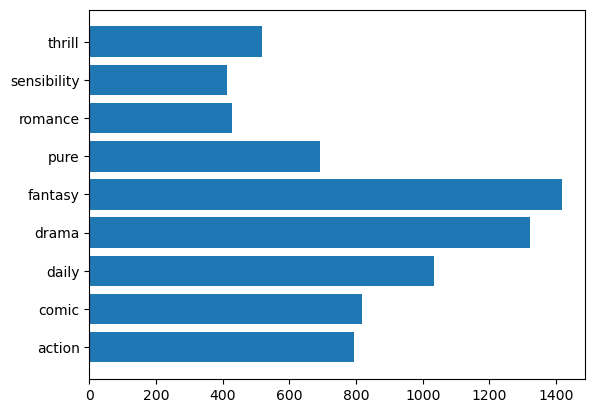

In [38]:
g_count = np.unique(webtoon['genre'], return_counts = True)
plt.barh(list(genre_dict.keys()),g_count[1])
plt.show()


In [39]:
genre_dict

{'action': 0,
 'comic': 1,
 'daily': 2,
 'drama': 3,
 'fantasy': 4,
 'pure': 5,
 'romance': 6,
 'sensibility': 7,
 'thrill': 8}

### 훈련 / 평가 자료 분할

In [40]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(webtoon['lem_description'], webtoon['genre'], random_state=493, stratify=webtoon['genre'], test_size=0.2)

### 텍스트 벡터화

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
num_words = 2000
my_token = Tokenizer(num_words =num_words, oov_token='oov')
my_token.fit_on_texts(train_x)

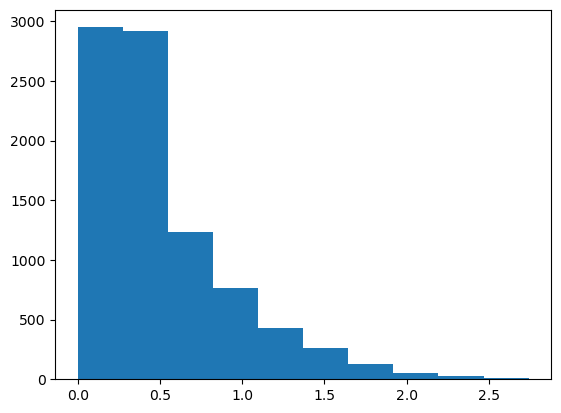

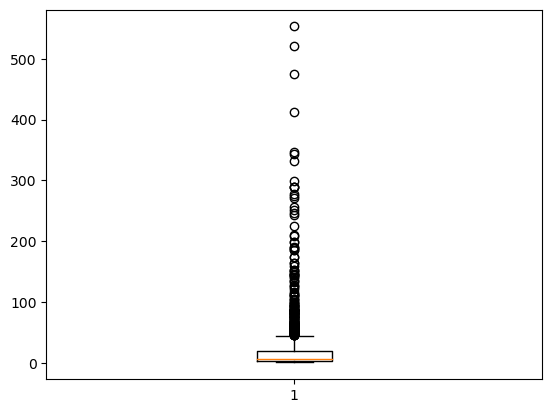

전체 토큰 수 : 8775
전체 토큰 빈도 수 : 60171
2000 위 까지 등장 토큰 빈도수 : 40028
비율 : 66.52374067241695


In [42]:
word_counts = dict(my_token.word_counts.items())
counts = list(word_counts.values())

plt.hist(np.log10(counts))
plt.show()
plt.boxplot(counts[:num_words])
plt.show()
print('전체 토큰 수 :', len(counts))
print('전체 토큰 빈도 수 :',np.sum(counts))
print(num_words,'위 까지 등장 토큰 빈도수 :', np.sum(counts[:num_words]))
print('비율 :',np.sum(counts[:num_words])/np.sum(counts) *100 )

In [43]:
sorted(word_counts.items(), key = lambda x :x[1], reverse=True)

[('일상', 553),
 ('사랑', 521),
 ('인간', 475),
 ('세상', 413),
 ('세계', 347),
 ('소녀', 344),
 ('친구', 332),
 ('받', 299),
 ('살', 290),
 ('로맨스', 290),
 ('자유', 289),
 ('소년', 277),
 ('주인공', 274),
 ('작가', 271),
 ('찾', 256),
 ('학교', 252),
 ('꿈', 247),
 ('판타지', 244),
 ('알', 226),
 ('생활', 211),
 ('만나', 208),
 ('남', 199),
 ('살아가', 199),
 ('매주', 191),
 ('삶', 189),
 ('사건', 189),
 ('인생', 185),
 ('집', 185),
 ('성장', 175),
 ('연애', 175),
 ('말', 165),
 ('게임', 165),
 ('좋', 159),
 ('비밀', 153),
 ('신', 153),
 ('현실', 152),
 ('눈', 150),
 ('능력', 147),
 ('죽', 146),
 ('가족', 145),
 ('특별', 145),
 ('기억', 145),
 ('마음', 142),
 ('생각', 141),
 ('업로드', 137),
 ('존재', 135),
 ('벌어지', 133),
 ('만들', 128),
 ('청춘', 126),
 ('드라마', 125),
 ('잃', 121),
 ('과거', 116),
 ('고양이', 113),
 ('귀신', 113),
 ('결혼', 112),
 ('힘', 111),
 ('사이', 110),
 ('몸', 106),
 ('운명', 105),
 ('액션', 103),
 ('하루', 101),
 ('일어나', 100),
 ('길', 99),
 ('고등학교', 97),
 ('작', 97),
 ('괴물', 95),
 ('시대', 94),
 ('악마', 94),
 ('금요일', 93),
 ('마을', 93),
 ('마왕', 92),
 ('먹', 90),
 ('지구', 8

In [44]:
my_token.word_index

{'oov': 1,
 '일상': 2,
 '사랑': 3,
 '인간': 4,
 '세상': 5,
 '세계': 6,
 '소녀': 7,
 '친구': 8,
 '받': 9,
 '살': 10,
 '로맨스': 11,
 '자유': 12,
 '소년': 13,
 '주인공': 14,
 '작가': 15,
 '찾': 16,
 '학교': 17,
 '꿈': 18,
 '판타지': 19,
 '알': 20,
 '생활': 21,
 '만나': 22,
 '남': 23,
 '살아가': 24,
 '매주': 25,
 '삶': 26,
 '사건': 27,
 '인생': 28,
 '집': 29,
 '성장': 30,
 '연애': 31,
 '말': 32,
 '게임': 33,
 '좋': 34,
 '비밀': 35,
 '신': 36,
 '현실': 37,
 '눈': 38,
 '능력': 39,
 '죽': 40,
 '가족': 41,
 '특별': 42,
 '기억': 43,
 '마음': 44,
 '생각': 45,
 '업로드': 46,
 '존재': 47,
 '벌어지': 48,
 '만들': 49,
 '청춘': 50,
 '드라마': 51,
 '잃': 52,
 '과거': 53,
 '고양이': 54,
 '귀신': 55,
 '결혼': 56,
 '힘': 57,
 '사이': 58,
 '몸': 59,
 '운명': 60,
 '액션': 61,
 '하루': 62,
 '일어나': 63,
 '길': 64,
 '고등학교': 65,
 '작': 66,
 '괴물': 67,
 '시대': 68,
 '악마': 69,
 '금요일': 70,
 '마을': 71,
 '마왕': 72,
 '먹': 73,
 '지구': 74,
 '동물': 75,
 '스토리': 76,
 '고등학생': 77,
 '반': 78,
 '보이': 79,
 '엄마': 80,
 '끝': 81,
 '저주': 82,
 '행복': 83,
 '왕': 84,
 '모험': 85,
 '순간': 86,
 '여행': 87,
 '우주': 88,
 '마법': 89,
 '물': 90,
 '죽음': 91,
 '용사': 92,
 '모습

In [45]:
train_lab_tokens = my_token.texts_to_sequences(train_x)
test_lab_tokens = my_token.texts_to_sequences(test_x)
lens = [len(x) for x in train_lab_tokens]
print(min(lens), np.mean(lens), np.median(lens), max(lens))
max_len = 18
print('전체 자료 수 :', len(lens))
print('전체 자료 길이 합 :',np.sum(lens))
print(max_len,'이상 길이 자료 수 :', len([x for x in lens if x >max_len]))
print(max_len,'이상 길이 자료 길이 합 :', np.sum([x for x in lens if x >max_len]))
print('비율 :',np.sum([x for x in lens if x >max_len])/np.sum(lens) *100 )

0 10.109375 8.0 101
전체 자료 수 : 5952
전체 자료 길이 합 : 60171
18 이상 길이 자료 수 : 798
18 이상 길이 자료 길이 합 : 21585
비율 : 35.87276262651443


In [46]:
sum([l==0 for l in lens])

110

In [47]:
# padding
from tensorflow.keras.utils import pad_sequences,to_categorical
train_lab_tokens_pad = pad_sequences(train_lab_tokens, maxlen=max_len)
test_lab_tokens_pad =pad_sequences(test_lab_tokens, maxlen=max_len)

print(train_lab_tokens_pad.shape, train_y.shape)
print(test_lab_tokens_pad.shape, test_y.shape)

(5952, 18) (5952,)
(1489, 18) (1489,)


In [48]:
train_ohe = to_categorical(train_lab_tokens_pad)
test_ohe = to_categorical(test_lab_tokens_pad,num_classes = num_words)
print(train_ohe.shape)
print(test_ohe.shape)

(5952, 18, 2000)
(1489, 18, 2000)


### model
1. one-hot encoding
2. embedding

In [52]:
### ONE-HOT ENCODING
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout
from tensorflow.keras.utils import set_random_seed
set_random_seed(493)
model1 = Sequential()
model1.add(SimpleRNN(
    64,
    input_shape = (max_len, num_words)
))
# model1.add(Dropout(0.3))
# model1.add(SimpleRNN(32))
model1.add(Dropout(0.5))
model1.add(Dense(16))
model1.add(Dense(
    len(genre_dict.keys()),
    activation = 'softmax'
))
model1.compile(optimizer=Adam(learning_rate = 0.00005),
               loss = 'sparse_categorical_crossentropy',
               metrics = 'accuracy')
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 64)                132160    
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                1040      
                                                                 
 dense_14 (Dense)            (None, 9)                 153       
                                                                 
Total params: 133,353
Trainable params: 133,353
Non-trainable params: 0
_________________________________________________________________


In [53]:
### EMBEDDING
set_random_seed(493)
model2 = Sequential()
model2.add(Embedding(
    num_words,
    64,
    input_length = max_len
))
# model2.add(SimpleRNN(
#     32,
#     return_sequences = True
# ))
# model2.add(SimpleRNN(
#     32,
#     return_sequences=True
# ))
# model2.add(Dropout(0.5))
model2.add(SimpleRNN(16))
model2.add(Dropout(0.5))

model2.add(Dense(
    len(genre_dict.keys()),
    activation = 'softmax'
))
model2.compile(optimizer=Adam(learning_rate = 0.00005),
               loss = 'sparse_categorical_crossentropy',
               metrics = 'accuracy')
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 18, 64)            128000    
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 16)                1296      
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 9)                 153       
                                                                 
Total params: 129,449
Trainable params: 129,449
Non-trainable params: 0
_________________________________________________________________


In [54]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model_path1 = 'model1.h5'
es_cb = EarlyStopping(monitor = 'val_loss', patience=5)
mc_cb = ModelCheckpoint(monitor = 'val_loss', filepath=model_path1, save_best_only=True)
result1 = model1.fit(train_ohe, train_y,  callbacks=[es_cb,mc_cb],
          epochs = 100, validation_split=0.2)

Epoch 1/100
149/149 [==============================] - 14s 75ms/step - loss: 2.2110 - accuracy: 0.1191 - val_loss: 2.1802 - val_accuracy: 0.1495
Epoch 2/100
149/149 [==============================] - 10s 66ms/step - loss: 2.1792 - accuracy: 0.1575 - val_loss: 2.1640 - val_accuracy: 0.1704
Epoch 3/100
149/149 [==============================] - 10s 64ms/step - loss: 2.1535 - accuracy: 0.1777 - val_loss: 2.1468 - val_accuracy: 0.1671
Epoch 4/100
149/149 [==============================] - 10s 65ms/step - loss: 2.1369 - accuracy: 0.1882 - val_loss: 2.1339 - val_accuracy: 0.1721
Epoch 5/100
149/149 [==============================] - 9s 63ms/step - loss: 2.1193 - accuracy: 0.1987 - val_loss: 2.1224 - val_accuracy: 0.1780
Epoch 6/100
149/149 [==============================] - 10s 64ms/step - loss: 2.0960 - accuracy: 0.2094 - val_loss: 2.1115 - val_accuracy: 0.1814
Epoch 7/100
149/149 [==============================] - 10s 64ms/step - loss: 2.0839 - accuracy: 0.2157 - val_loss: 2.0985 - val_acc

In [55]:
model_path2 = 'model2.h5'
mc_cb2 = ModelCheckpoint(monitor = 'val_loss',  filepath=model_path2, save_best_only=True)
result2 = model2.fit(train_lab_tokens_pad, train_y, callbacks=[es_cb,mc_cb2],
          epochs = 100, validation_split=0.2)

Epoch 1/100
149/149 [==============================] - 7s 23ms/step - loss: 2.2071 - accuracy: 0.1204 - val_loss: 2.1919 - val_accuracy: 0.1343
Epoch 2/100
149/149 [==============================] - 3s 18ms/step - loss: 2.1961 - accuracy: 0.1273 - val_loss: 2.1843 - val_accuracy: 0.1461
Epoch 3/100
149/149 [==============================] - 3s 17ms/step - loss: 2.1816 - accuracy: 0.1498 - val_loss: 2.1775 - val_accuracy: 0.1620
Epoch 4/100
149/149 [==============================] - 2s 16ms/step - loss: 2.1720 - accuracy: 0.1678 - val_loss: 2.1704 - val_accuracy: 0.1721
Epoch 5/100
149/149 [==============================] - 2s 16ms/step - loss: 2.1617 - accuracy: 0.1741 - val_loss: 2.1635 - val_accuracy: 0.1797
Epoch 6/100
149/149 [==============================] - 3s 17ms/step - loss: 2.1469 - accuracy: 0.1949 - val_loss: 2.1565 - val_accuracy: 0.1864
Epoch 7/100
149/149 [==============================] - 3s 18ms/step - loss: 2.1380 - accuracy: 0.1985 - val_loss: 2.1509 - val_accuracy:

In [56]:
from tensorflow.keras.models import load_model
model1 = load_model(model_path1)
model1.evaluate(test_ohe, test_y)

47/47 [==============================] - 3s 36ms/step - loss: 2.0600 - accuracy: 0.2431


[2.059968948364258, 0.24311618506908417]

In [57]:
model2 = load_model(model_path2)
model2.evaluate(test_lab_tokens_pad, test_y)

47/47 [==============================] - 1s 7ms/step - loss: 2.1305 - accuracy: 0.1679


[2.1304569244384766, 0.16789792478084564]

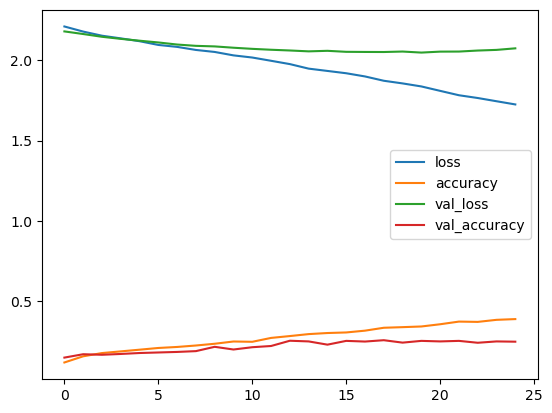

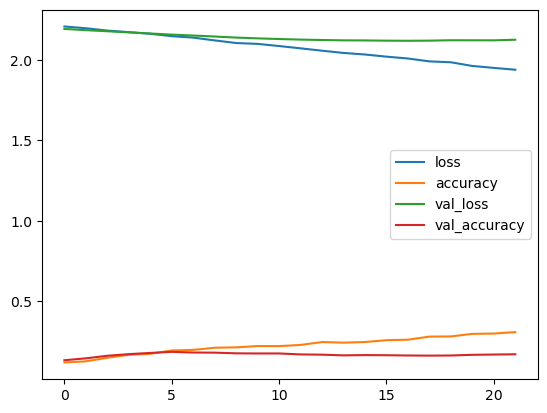

In [58]:
for c in (result1.history.keys()):
    plt.plot(range(len(result1.history[c])), result1.history[c], label = c)
    
plt.legend()
plt.show()

for c in (result2.history.keys()):
    plt.plot(range(len(result2.history[c])), result2.history[c], label = c)
    
plt.legend()
plt.show()

### LSTM

In [59]:
### ONE-HOT ENCODING
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout, LSTM
from tensorflow.keras.utils import set_random_seed
set_random_seed(493)

model3 = Sequential()
model3.add(LSTM(64,input_shape=(max_len, num_words))) #input_shape은 x의 라벨값 6개 시퀀스 출력은 True 512차원 출력
model3.add(Dropout(0.5)) #과적합 방지를 위한 드랍아웃 비율은 0.3
# model3.add(LSTM(32, return_sequences=True)) #LSTM 층  256차원출력
# model3.add(Dropout(0.3)) #드랍아웃 층
model3.add(Dense(16)) #LSTM층 128차원 출력
model3.add(Dense(
    len(genre_dict.keys()),
    activation = 'softmax'
))
model3.compile(optimizer=Adam(learning_rate = 0.00005),
               loss = 'sparse_categorical_crossentropy',
               metrics = 'accuracy')
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                528640    
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                1040      
                                                                 
 dense_17 (Dense)            (None, 9)                 153       
                                                                 
Total params: 529,833
Trainable params: 529,833
Non-trainable params: 0
_________________________________________________________________


In [60]:
### EMBEDDING
set_random_seed(493)
model4 = Sequential()
model4.add(Embedding(
    num_words,
    256,
    input_length = max_len
))
# model2.add(SimpleRNN(
#     32,
#     return_sequences = True
# ))
model4.add(LSTM(64,input_shape=(max_len, num_words))) #input_shape은 x의 라벨값 6개 시퀀스 출력은 True 512차원 출력

model4.add(Dropout(0.5))
model4.add(Dense(32))
# model4.add(Dropout(0.3))
# model4.add(Dense(16))
model4.add(Dense(
    len(genre_dict.keys()),
    activation = 'softmax'
))
model4.compile(optimizer=Adam(learning_rate = 0.00005),
               loss = 'sparse_categorical_crossentropy',
               metrics = 'accuracy')
model4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 18, 256)           512000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 9)                 297       
                                                                 
Total params: 596,553
Trainable params: 596,553
Non-trainable params: 0
_________________________________________________________________


In [61]:
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout, LSTM, Bidirectional
### EMBEDDING
set_random_seed(493)
model5 = Sequential()
model5.add(Embedding(
    num_words,
    128,
    input_length = max_len
))
# model2.add(SimpleRNN(
#     32,
#     return_sequences = True
# ))
model5.add(Bidirectional(
    LSTM(64,input_shape=(max_len, num_words))) #input_shape은 x의 라벨값 6개 시퀀스 출력은 True 512차원 출력
          )
model5.add(Dropout(0.5))
# model5.add(Bidirectional(LSTM(32)))
# model5.add(Dropout(0.3))
model5.add(Dense(16))
model5.add(Dense(
    len(genre_dict.keys()),
    activation = 'softmax'
))
model5.compile(optimizer=Adam(learning_rate = 0.00005),
               loss = 'sparse_categorical_crossentropy',
               metrics = 'accuracy')
model5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 18, 128)           256000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 16)                2064      
                                                                 
 dense_21 (Dense)            (None, 9)                 153       
                                                                 
Total params: 357,033
Trainable params: 357,033
Non-trainable params: 0
_______________________________________________

In [62]:
model_path3 = 'model3.h5'
mc_cb3 = ModelCheckpoint(monitor = 'val_loss', filepath=model_path3, save_best_only=True)
result3 = model3.fit(train_ohe, train_y,  callbacks=[es_cb,mc_cb3],
          epochs = 100, validation_split=0.2)

Epoch 1/100
149/149 [==============================] - 39s 210ms/step - loss: 2.1912 - accuracy: 0.1426 - val_loss: 2.1833 - val_accuracy: 0.1864
Epoch 2/100
149/149 [==============================] - 26s 178ms/step - loss: 2.1759 - accuracy: 0.1901 - val_loss: 2.1630 - val_accuracy: 0.1788
Epoch 3/100
149/149 [==============================] - 33s 219ms/step - loss: 2.1532 - accuracy: 0.1953 - val_loss: 2.1321 - val_accuracy: 0.1788
Epoch 4/100
149/149 [==============================] - 31s 205ms/step - loss: 2.1302 - accuracy: 0.1924 - val_loss: 2.1110 - val_accuracy: 0.1788
Epoch 5/100
149/149 [==============================] - 29s 197ms/step - loss: 2.1196 - accuracy: 0.1943 - val_loss: 2.0989 - val_accuracy: 0.1788
Epoch 6/100
149/149 [==============================] - 30s 199ms/step - loss: 2.1104 - accuracy: 0.1966 - val_loss: 2.0913 - val_accuracy: 0.1788
Epoch 7/100
149/149 [==============================] - 31s 205ms/step - loss: 2.1035 - accuracy: 0.1897 - val_loss: 2.0837 -

In [63]:
model_path4 = 'model4.h5'
mc_cb4 = ModelCheckpoint(monitor = 'val_loss',  filepath=model_path4, save_best_only=True)
result4 = model4.fit(train_lab_tokens_pad, train_y, callbacks=[es_cb,mc_cb4],
          epochs = 100, validation_split=0.2)

Epoch 1/100
149/149 [==============================] - 21s 97ms/step - loss: 2.1824 - accuracy: 0.1661 - val_loss: 2.1581 - val_accuracy: 0.1948
Epoch 2/100
149/149 [==============================] - 12s 81ms/step - loss: 2.1398 - accuracy: 0.1909 - val_loss: 2.1009 - val_accuracy: 0.2082
Epoch 3/100
149/149 [==============================] - 13s 86ms/step - loss: 2.1137 - accuracy: 0.1939 - val_loss: 2.0869 - val_accuracy: 0.1864
Epoch 4/100
149/149 [==============================] - 12s 82ms/step - loss: 2.1018 - accuracy: 0.2027 - val_loss: 2.0812 - val_accuracy: 0.1839
Epoch 5/100
149/149 [==============================] - 13s 85ms/step - loss: 2.0884 - accuracy: 0.2098 - val_loss: 2.0734 - val_accuracy: 0.1889
Epoch 6/100
149/149 [==============================] - 14s 93ms/step - loss: 2.0818 - accuracy: 0.2102 - val_loss: 2.0663 - val_accuracy: 0.2091
Epoch 7/100
149/149 [==============================] - 14s 94ms/step - loss: 2.0693 - accuracy: 0.2189 - val_loss: 2.0529 - val_ac

In [64]:
model_path5 = 'model5.h5'
mc_cb5 = ModelCheckpoint(monitor = 'val_loss',  filepath=model_path5, save_best_only=True)
result5 = model5.fit(train_lab_tokens_pad, train_y, callbacks=[es_cb,mc_cb5],
          epochs = 100, validation_split=0.2)

Epoch 1/100
149/149 [==============================] - 28s 107ms/step - loss: 2.1836 - accuracy: 0.1533 - val_loss: 2.1644 - val_accuracy: 0.1898
Epoch 2/100
149/149 [==============================] - 11s 74ms/step - loss: 2.1476 - accuracy: 0.1754 - val_loss: 2.1203 - val_accuracy: 0.1881
Epoch 3/100
149/149 [==============================] - 10s 69ms/step - loss: 2.1180 - accuracy: 0.1825 - val_loss: 2.0944 - val_accuracy: 0.2124
Epoch 4/100
149/149 [==============================] - 11s 77ms/step - loss: 2.1012 - accuracy: 0.1976 - val_loss: 2.0830 - val_accuracy: 0.1814
Epoch 5/100
149/149 [==============================] - 11s 73ms/step - loss: 2.0934 - accuracy: 0.1934 - val_loss: 2.0744 - val_accuracy: 0.1797
Epoch 6/100
149/149 [==============================] - 11s 71ms/step - loss: 2.0794 - accuracy: 0.1985 - val_loss: 2.0651 - val_accuracy: 0.1814
Epoch 7/100
149/149 [==============================] - 10s 70ms/step - loss: 2.0635 - accuracy: 0.2092 - val_loss: 2.0536 - val_a

In [65]:
model3 = load_model(model_path3)
model3.evaluate(test_ohe, test_y)

47/47 [==============================] - 6s 92ms/step - loss: 1.9971 - accuracy: 0.2854


[1.9971200227737427, 0.28542646765708923]

In [66]:
model4 = load_model(model_path4)
model4.evaluate(test_lab_tokens_pad, test_y)

47/47 [==============================] - 3s 24ms/step - loss: 1.9194 - accuracy: 0.3076


[1.9193743467330933, 0.30758899450302124]

In [67]:
model5 = load_model(model_path5)
model5.evaluate(test_lab_tokens_pad, test_y)

47/47 [==============================] - 4s 33ms/step - loss: 1.9553 - accuracy: 0.2942


[1.9552730321884155, 0.29415714740753174]

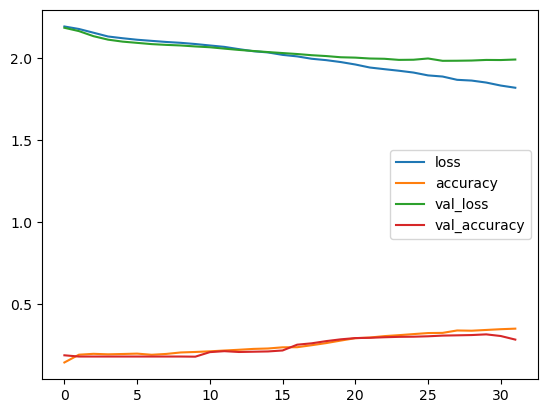

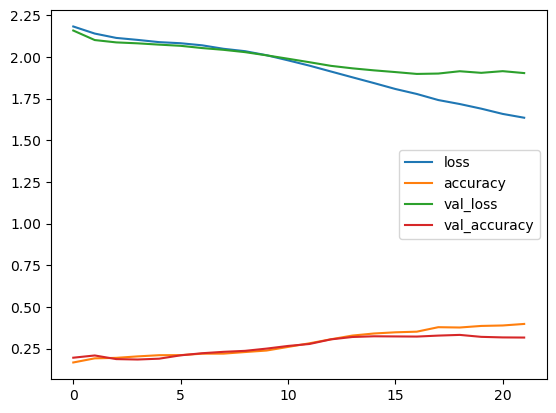

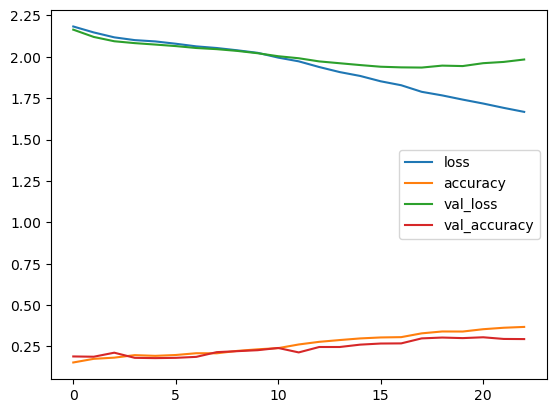

In [68]:

for c in (result3.history.keys()):
    plt.plot(range(len(result3.history[c])), result3.history[c], label = c)
    
plt.legend()
plt.show()

for c in (result4.history.keys()):
    plt.plot(range(len(result4.history[c])), result4.history[c], label = c)
    
plt.legend()
plt.show()

for c in (result5.history.keys()):
    plt.plot(range(len(result5.history[c])), result5.history[c], label = c)
    
plt.legend()
plt.show()

### RNN 말고 그냥 DNN

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(train_x).toarray()
# tfidf_train = [d/sum(d) if sum(d) else [0]*len(d) for  d in tfidf_train]
tfidf_test = tfidf.transform(test_x).toarray()
# tfidf_test = [d/sum(d) if sum(d) else [0]*len(d) for  d in tfidf_test]

In [70]:
print(len(tfidf_train), len(tfidf_train[0]), train_y.shape)
print(len(tfidf_test), len(tfidf_test[0]), test_y.shape)

5952 8139 (5952,)
1489 8139 (1489,)


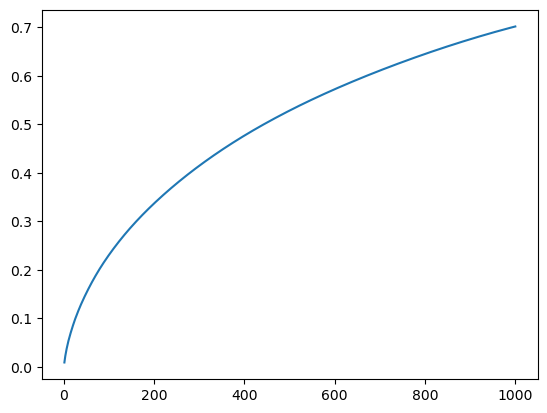

In [71]:
from sklearn.decomposition import PCA
n_pca=1000
pca = PCA(n_pca)
pca.fit(tfidf_train)
plt.plot(range(1,n_pca+1), np.cumsum(pca.explained_variance_ratio_))
plt.show()


In [72]:
pca_tfidf_train = pca.transform(tfidf_train)
pca_tfidf_test = pca.transform(tfidf_test)

In [73]:
### tf-idf 기반 DNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import set_random_seed
set_random_seed(493)

model_tfidf = Sequential()
model_tfidf.add(Dense(64,input_shape=(pca_tfidf_train.shape[1],), activation= 'relu') )
# model_tfidf.add(Dropout(0.5)) 
# model_tfidf.add(Dense(32, activation= 'relu'))
model_tfidf.add(Dropout(0.5)) 
model_tfidf.add(Dense(16, activation= 'relu'))
model_tfidf.add(Dense(
    len(genre_dict.keys()),
    activation = 'softmax'
))
model_tfidf.compile(optimizer=Adam(learning_rate = 0.00005),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
model_tfidf.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                64064     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                1040      
                                                                 
 dense_24 (Dense)            (None, 9)                 153       
                                                                 
Total params: 65,257
Trainable params: 65,257
Non-trainable params: 0
_________________________________________________________________


In [74]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es_cb = EarlyStopping(monitor = 'val_loss', patience=5)
model_path_tfidf = 'model_tfidf.h5'
mc_cb_tfidf = ModelCheckpoint(monitor = 'val_loss',  filepath=model_path_tfidf, save_best_only=True)
result_tfidf = model_tfidf.fit(pca_tfidf_train, train_y, callbacks=[es_cb,mc_cb_tfidf],
          epochs = 100, validation_split=0.2)


C:\Users\jhs85\anaconda3\envs\mecab\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
149/149 [==============================] - 3s 11ms/step - loss: 2.2007 - accuracy: 0.0863 - val_loss: 2.1964 - val_accuracy: 0.1201
Epoch 2/100
149/149 [==============================] - 2s 11ms/step - loss: 2.1958 - accuracy: 0.1348 - val_loss: 2.1925 - val_accuracy: 0.1772
Epoch 3/100
149/149 [==============================] - 1s 8ms/step - loss: 2.1926 - accuracy: 0.1741 - val_loss: 2.1892 - val_accuracy: 0.1948
Epoch 4/100
149/149 [==============================] - 1s 8ms/step - loss: 2.1886 - accuracy: 0.1813 - val_loss: 2.1859 - val_accuracy: 0.1948
Epoch 5/100
149/149 [==============================] - 2s 17ms/step - loss: 2.1847 - accuracy: 0.1985 - val_loss: 2.1824 - val_accuracy: 0.1898
Epoch 6/100
149/149 [==============================] - 4s 26ms/step - loss: 2.1808 - accuracy: 0.2006 - val_loss: 2.1789 - val_accuracy: 0.1856
Epoch 7/100
149/149 [==============================] - 1s 9ms/step - loss: 2.1773 - accuracy: 0.1987 - val_loss: 2.1752 - val_accuracy: 0.

Epoch 58/100
149/149 [==============================] - 1s 7ms/step - loss: 1.8681 - accuracy: 0.3291 - val_loss: 1.9487 - val_accuracy: 0.2897
Epoch 59/100
149/149 [==============================] - 1s 8ms/step - loss: 1.8695 - accuracy: 0.3319 - val_loss: 1.9459 - val_accuracy: 0.2855
Epoch 60/100
149/149 [==============================] - 1s 7ms/step - loss: 1.8596 - accuracy: 0.3308 - val_loss: 1.9429 - val_accuracy: 0.2846
Epoch 61/100
149/149 [==============================] - 1s 8ms/step - loss: 1.8515 - accuracy: 0.3314 - val_loss: 1.9401 - val_accuracy: 0.2872
Epoch 62/100
149/149 [==============================] - 1s 8ms/step - loss: 1.8466 - accuracy: 0.3335 - val_loss: 1.9373 - val_accuracy: 0.2905
Epoch 63/100
149/149 [==============================] - 1s 8ms/step - loss: 1.8424 - accuracy: 0.3359 - val_loss: 1.9346 - val_accuracy: 0.2905
Epoch 64/100
149/149 [==============================] - 1s 8ms/step - loss: 1.8353 - accuracy: 0.3367 - val_loss: 1.9320 - val_accuracy:

In [75]:
from tensorflow.keras.models import load_model
model_tfidf = load_model(model_path_tfidf)
model_tfidf.evaluate(pca_tfidf_test, test_y)

47/47 [==============================] - 1s 4ms/step - loss: 1.8857 - accuracy: 0.3163


[1.8857452869415283, 0.31631967425346375]

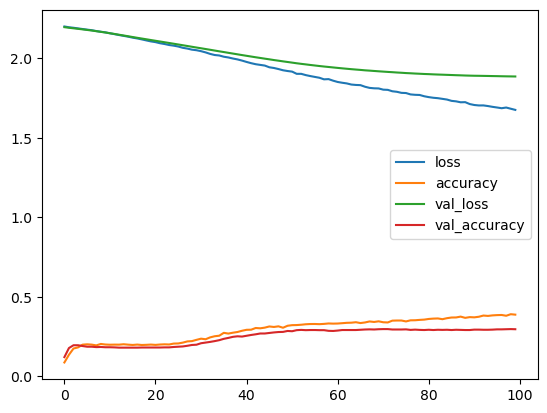

In [76]:

for c in (result_tfidf.history.keys()):
    plt.plot(range(len(result_tfidf.history[c])), result_tfidf.history[c], label = c)
    
plt.legend()
plt.show()
